# Importing and Loading packages

### First, we need to install the package "here" so that we can call all mudules without thinking about path. 

### Then, we can load and install the rest of the packages from the file module.R 


In [ ]:
# install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

# Importing and Exploring the Dataset

In [2]:
before_dataset <- read_excel(path = here('Data','before_pa.xlsx'))
before_dataset <- data.frame(before_dataset)
dim(before_dataset)
head(before_dataset)


[1] 1255   77

,sex,age_range,martialStatus,state,zone,co.resident_range,rooms_range,income_range,scholarity,diabetes,...,PA_easiness_others_before,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_practice_during
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,25,2,1,1,4,4,0,...,0,0,0,0,0,1,0,0,0,1
2,2,3,1,21,1,2,3,6,4,0,...,0,0,1,0,0,0,0,0,0,0
3,1,3,1,21,1,2,2,5,3,0,...,0,0,0,0,1,0,0,0,0,0
4,1,3,1,21,1,1,1,3,4,0,...,0,0,0,0,0,1,0,0,0,0
5,1,2,2,25,2,2,2,6,4,0,...,0,1,0,0,0,0,0,0,0,0
6,2,3,2,21,1,2,2,6,6,0,...,0,1,0,0,0,0,0,0,0,0


### As we expected, R is interpreting almost all variables as numerical data

In [3]:
unique(sapply(before_dataset, class))

[1] "numeric"

# Treating missing data

In [4]:
before_dataset <- na.omit(before_dataset)
dim(before_dataset)


[1] 1242   77

# Treating variables type



In [5]:
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 0] <- "practice"
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 1] <- "dont_practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 0] <- "practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 1] <- "dont_practice"


before_dataset$PA_intensity_before[before_dataset$PA_intensity_before == 4] <- "dont_practice"
before_dataset$PA_intensity_before[before_dataset$PA_intensity_before == 1] <- "light"
before_dataset$PA_intensity_before[before_dataset$PA_intensity_before == 2] <- "moderate"
before_dataset$PA_intensity_before[before_dataset$PA_intensity_before == 3] <- "hard"



before_dataset[] <- lapply(before_dataset, as.factor)
head(before_dataset)
summary(before_dataset[, "PA_practice_during"])
summary(before_dataset[, "PA_intensity_before"])


,sex,age_range,martialStatus,state,zone,co.resident_range,rooms_range,income_range,scholarity,diabetes,...,PA_easiness_others_before,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_practice_during
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,2,1,25,2,1,1,4,4,0,...,0,0,0,0,0,1,0,0,0,dont_practice
2,2,3,1,21,1,2,3,6,4,0,...,0,0,1,0,0,0,0,0,0,practice
3,1,3,1,21,1,2,2,5,3,0,...,0,0,0,0,1,0,0,0,0,practice
4,1,3,1,21,1,1,1,3,4,0,...,0,0,0,0,0,1,0,0,0,practice
5,1,2,2,25,2,2,2,6,4,0,...,0,1,0,0,0,0,0,0,0,practice
6,2,3,2,21,1,2,2,6,6,0,...,0,1,0,0,0,0,0,0,0,practice


dont_practice      practice 
          346           896

dont_practice          hard         light      moderate 
          133           357           162           590

In [6]:
head(lapply(before_dataset, levels))


colnames(before_dataset)

$sex
[1] "1" "2" "3"

$age_range
[1] "1" "2" "3" "4" "5" "6" "7" "8"

$martialStatus
[1] "1" "2" "3" "4"

$state
 [1] "1"  "2"  "3"  "5"  "6"  "7"  "8"  "9"  "10" "13" "14" "15" "16" "17" "19"
[16] "20" "21" "22" "23" "24" "25" "26"

$zone
[1] "1" "2" "3" "4" "5"

$co.resident_range
[1] "1" "2" "3" "4"

[1] "sex"                                            
 [2] "age_range"                                      
 [3] "martialStatus"                                  
 [4] "state"                                          
 [5] "zone"                                           
 [6] "co.resident_range"                              
 [7] "rooms_range"                                    
 [8] "income_range"                                   
 [9] "scholarity"                                     
[10] "diabetes"                                       
[11] "hypertension"                                   
[12] "dyslipidemia"                                   
[13] "DT"                                             
[14] "asthma"                                         
[15] "Bronchitis"                                     
[16] "DPOC"                                           
[17] "osteoporosis"                                   
[18] "cancer"                                         
[19] "DA"                                             
[20] "DP"                                             
[21] "depression"                                     
[22] "TAG"                                            
[23] "THB"                                            
[24] "Schizophrenia"                                  
[25] "disease_free"                                   
[26] "another_diseases"                               
[27] "depression_anxiety"                             
[28] "Health_professional"                            
[29] "happy_before"                                   
[30] "optimistic_before"                              
[31] "hopeful_before"                                 
[32] "worried_before"                                 
[33] "sad_before"                                     
[34] "anxious_before"                                 
[35] "confused_before"                                
[36] "hopeless_before"                                
[37] "tense_before"                                   
[38] "nothing_to_say_about_feelings_before"           
[39] "no_listed_feelings_before"                      
[40] "sedentary_time_range_before"                    
[41] "PA_practice_before"                             
[42] "running_before"                                 
[43] "hiking_before"                                  
[44] "cycling_before"                                 
[45] "muscle_training_before"                         
[46] "soccer_before"                                  
[47] "tennis_before"                                  
[48] "volleyball_before"                              
[49] "basketball_before"                              
[50] "swimming_before"                                
[51] "surfing_before"                                 
[52] "yoga_before"                                    
[53] "pilates_before"                                 
[54] "fighting_before"                                
[55] "other_sports_before"                            
[56] "PA_weekly_frequency_before"                     
[57] "PA_intensity_before"                            
[58] "PA_duration_before"                             
[59] "PA_easiness_before"                             
[60] "PA_easiness_professional_guidance_before"       
[61] "PA_easiness_unguided_before"                    
[62] "PA_easiness_collective_before"                  
[63] "PA_easiness_music_before"                       
[64] "PA_easiness_family_before"                      
[65] "PA_easiness_home_activity_before"               
[66] "PA_easiness_home_space_before"                  
[67] "PA_easiness_home_equipament_before"             
[68] "PA_easiness_others_before"                      
[69] "PA_barriers_before_time_family_responsabilities"
[70] "PA_barriers_before_tiredness"                   
[71] "PA_barriers_before_location_distance"           
[72] "PA_barriers_before_money"                       
[73] "PA_barriers_before_time_convenience

In [7]:
# ordinal_columns = c(
#     'age_range',
#     'rooms_range',
#     'income_range',
#     'scholarity',
#     'sedentary_time_range_before',
#     'co.resident_range',
#     "PA_weekly_frequency_before")
# before_dataset[, ordinal_columns] <- lapply(before_dataset[, ordinal_columns], as.ordered)



# before_dataset[1, 2] < before_dataset[2, 2] 
# head(before_dataset[, ordinal_columns])

In [8]:
#before_dataset[, 'PA_intensity_before'] <- factor(before_dataset[, 'PA_intensity_before'], levels = c("dont_practice", "light", "moderate", "hard"), ordered=TRUE)
# before_dataset[, 'PA_duration_before'] <- factor(before_dataset[, 'PA_duration_before'], levels = c(5, 1, 2, 3, 4), ordered=TRUE)


# summary(before_dataset[, 'PA_intensity_before'])
# summary(before_dataset[, 'PA_weekly_frequency_before'])
# summary(before_dataset[, 'PA_duration_before'])
# summary(before_dataset[, 'PA_practice_before'])


In [9]:
lapply(before_dataset, levels)[0:10]
before_dataset <- subset(before_dataset, select = -c(DA, DP))

$sex
[1] "1" "2" "3"

$age_range
[1] "1" "2" "3" "4" "5" "6" "7" "8"

$martialStatus
[1] "1" "2" "3" "4"

$state
 [1] "1"  "2"  "3"  "5"  "6"  "7"  "8"  "9"  "10" "13" "14" "15" "16" "17" "19"
[16] "20" "21" "22" "23" "24" "25" "26"

$zone
[1] "1" "2" "3" "4" "5"

$co.resident_range
[1] "1" "2" "3" "4"

$rooms_range
[1] "1" "2" "3" "4"

$income_range
[1] "1" "2" "3" "4" "5" "6"

$scholarity
[1] "2" "3" "4" "5" "6"

$diabetes
[1] "0" "1"

# Finnaly apply the model

In [10]:
summary(before_dataset[, ncol(before_dataset)])

dont_practice      practice 
          346           896

In [11]:
set.seed(2)
lista_treino <- createDataPartition(before_dataset$PA_practice_during, p=0.7, list=FALSE)
treino <- before_dataset[lista_treino,]
teste <- before_dataset[-lista_treino,]

CART 

871 samples
 74 predictor
  2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 871, 871, 871, 871, 871, 871, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01234568  0.7025675  0.1958481
  0.01851852  0.7138019  0.1789551
  0.02057613  0.7133351  0.1753314

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01234568.
Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            36       26
  practice                 67      242
                                         
               Accuracy : 0.7493         
                 95% CI : (0.702, 0.7926)
    No Information Rate : 0.7224         
    P-Value [Acc > NIR] : 0.1349         
                                         
                  Kappa : 0.2878         
                              

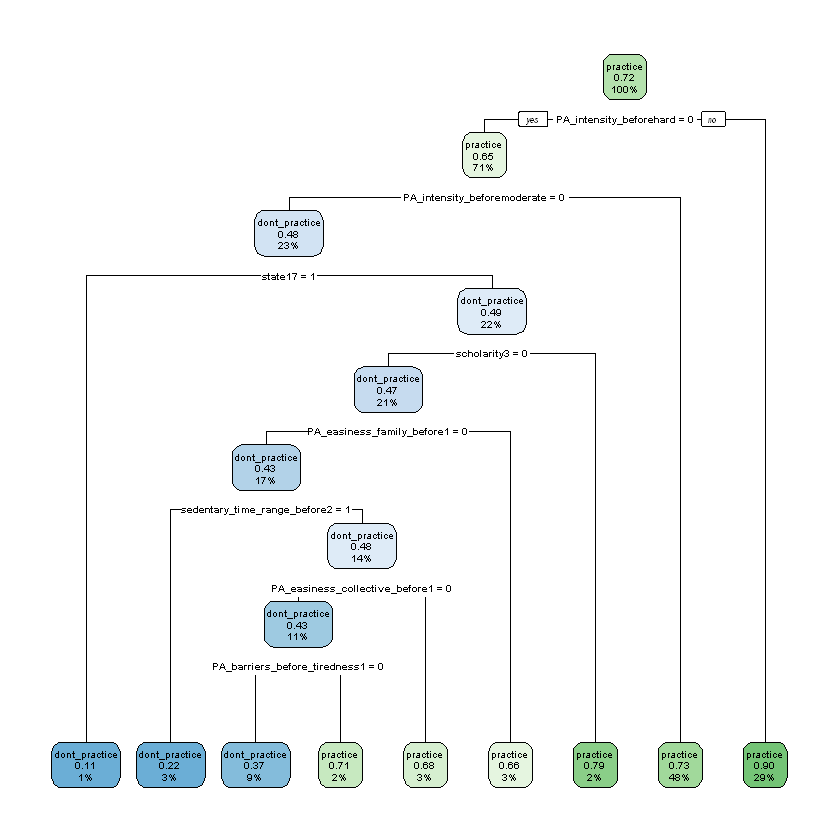

In [16]:
form = as.formula(paste("PA_practice_during",'~.'))
modelo <<- train(form , data=treino, method="rpart", metric="Kappa", trControl = trainControl(method = "boot"))
print(modelo)
pred <<- predict(modelo, teste)
confM <<- confusionMatrix(pred, teste[,ncol(before_dataset)])

print(confM)
rpart.plot(modelo$finalModel)

In [12]:
treino.aug <<- treino

n = nrow(treino[treino["PA_practice_during"]=="practice",]) - nrow(treino[treino["PA_practice_during"]=="dont_practice",])
print(n)
j=1
while(j<n){
  cand = GenerateMultipleCandidates(data=treino, Class="dont_practice", col=ncol(before_dataset), Prob=0.9, amount=1)
  if(!anyNA(cand)){
    treino.aug <<- rbind(treino.aug, cand)
    j=j+1
  }
}


[1] 385


In [13]:
summary(treino.aug[, "PA_practice_during"]) 

dont_practice      practice 
          627           628

CART 

1255 samples
  74 predictor
   2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1255, 1255, 1255, 1255, 1255, 1255, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa     
  0.02870813  0.6537542  0.30908944
  0.04545455  0.6452472  0.29381575
  0.25518341  0.5157900  0.05440989

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02870813.
Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            76      146
  practice                 27      122
                                          
               Accuracy : 0.5337          
                 95% CI : (0.4815, 0.5854)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1424          
          

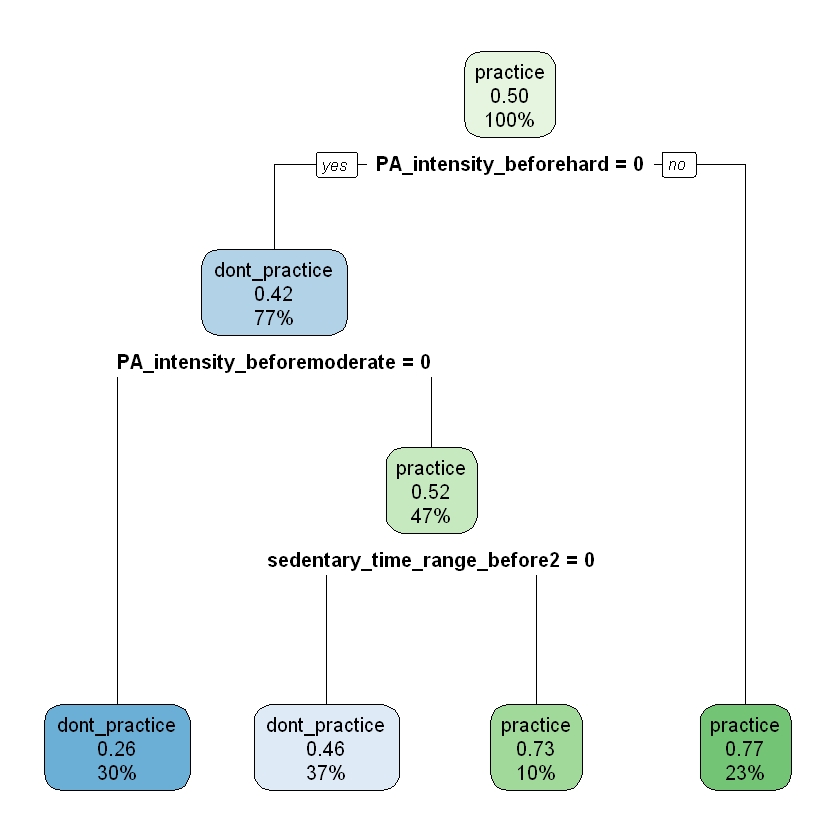

In [15]:
form = as.formula(paste("PA_practice_during",'~.'))
modelo.aug <<- train(form , data=treino.aug, method="rpart", metric="Kappa", trControl = trainControl(method = "boot"))
print(modelo.aug)
pred.aug <<- predict(modelo.aug, teste)
confM.aug <<- confusionMatrix(pred.aug, teste[,ncol(before_dataset)])

print(confM.aug)
rpart.plot(modelo.aug$finalModel)